In [1]:
%matplotlib inline 
import openmc 
import matplotlib.pyplot as plt

In [2]:
# Definition of materials.
# Note that the temperatures are in Kelvin units.

# Gas gap composition
helium = openmc.Material(name='Helium')
helium.set_density('g/cm3', 0.000442)
helium.add_element('He', 1,'wo')
helium.temperature = 913 

# Clad composition
sc = openmc.Material(name='Silicon Carbide')
sc.add_element('Si',0.5)
sc.add_element('C',0.5)
sc.set_density('g/cm3', 2.6)
sc.temperature = 913

# Coolant composition 
helium1 = openmc.Material(name='Helium')
helium1.set_density('g/cm3', 0.003593)
helium1.add_element('He', 1,'wo')
helium1.temperature = 913 

#w14Re liner
wr = openmc.Material(name= 'W14Re')
wr.set_density('g/cm3', 19.48)
wr.add_element('W', 0.86, 'wo')
wr.add_element('Re', 0.14, 'wo')
wr.temperature = 913

#Rhenium
r = openmc.Material(name='Rhenium')
r.add_element('Re', 1 )
r.set_density('g/cm3', 21.02)
r.temperature = 913

#sic liner
sc1 = openmc.Material(name='Silicon Carbide liner')
sc1.add_element('Si',0.5)
sc1.add_element('C',0.5)
sc1.set_density('g/cm3', 2.6)
sc1.temperature = 913


In [3]:
# Fuel composition 


#PuC & UC compositions

puc= openmc.Material(name='Pu composition')
puc.add_nuclide('Pu238', 2.7/100)
puc.add_nuclide('Pu239', 56.0/100)
puc.add_nuclide('Pu240', 25.9/100)
puc.add_nuclide('Pu241', 7.4/100)
puc.add_nuclide('Pu242', 8.0/100)
puc.add_element('O', 2)
puc.set_density('g/cm3', 10.88)
puc.temperature = 1263



uc= openmc.Material(name='U composition')
uc.add_nuclide('U235', 0.72/100)
uc.add_nuclide('U238', 99.28/100)
uc.add_element('O', 2)
uc.set_density('g/cm3', 10.904)
uc.temperature = 1263

# Th = openmc.Material(name='Thorium natural')
# Th.add_nuclide('Th232', 1)
# Th.set_density('g/cm3', 9.54)
# Th.temperature = 1263


# Minor actinide (MA) composition
MA_0 = openmc.Material(name = 'Minor Actinides')
MA_0.add_nuclide('Np237', 0.562, 'wo')
MA_0.add_nuclide('Am241', 0.264, 'wo')
MA_0.add_nuclide('Am243', 0.12, 'wo')
MA_0.add_nuclide('Cm243', 0.0003, 'wo')
MA_0.add_nuclide('Cm244', 0.0511, 'wo')
MA_0.add_nuclide('Cm245', 0.0026, 'wo')
MA_0.set_density('g/cm3', 15.43)
MA_0.temperature = 1263




PuC_UC_IC = openmc.Material.mix_materials([puc, uc], [0.1412, 0.8588], 'vo')



MA_fuel = openmc.Material.mix_materials([PuC_UC_IC,MA_0], [0.95, 0.05], 'wo')
MA_fuel.name = 'MA + fuel'
MA_fuel.temperature = 1263


In [4]:
# Instantiate a materials collection and export it to XML

materials_file = openmc.Materials([helium, sc, sc1, helium1, wr, r, MA_fuel])
materials_file.export_to_xml()

print(materials_file)

[Material
	ID             =	1
	Name           =	Helium
	Temperature    =	913
	Density        =	0.000442 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	He3            =	1.507034605870082e-06 [wo]
	He4            =	0.9999984929653941 [wo]
, Material
	ID             =	2
	Name           =	Silicon Carbide
	Temperature    =	913
	Density        =	2.6 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Si28           =	0.4611484    [ao]
	Si29           =	0.0234158    [ao]
	Si30           =	0.0154358    [ao]
	C12            =	0.494461     [ao]
	C13            =	0.005539     [ao]
, Material
	ID             =	6
	Name           =	Silicon Carbide liner
	Temperature    =	913
	Density        =	2.6 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Si28           =	0.4611484    [ao]
	Si29           =	0.0234158    [ao]
	Si30           =	0.0154358    [ao]
	C12     

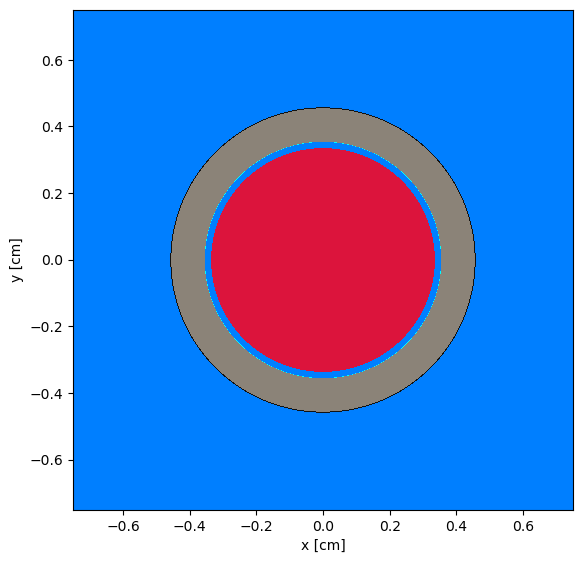

In [5]:
# Instantiate cylindrical surfaces 
# All lengths are in cm. The core design is based on the GFR2400.
# The GFR core active height is 165 cm.

pin  = openmc.ZCylinder(r=0.3355)
gap  = openmc.ZCylinder(r=0.35)
w14Re  = openmc.ZCylinder(r=0.354)
Re  = openmc.ZCylinder(r=0.355)
clad = openmc.ZCylinder(r=0.455)
sic_liner  = openmc.ZCylinder(r=0.458)

# top      = openmc.ZPlane(z0=165/2, name='top', boundary_type = 'reflective')
# bottom   = openmc.ZPlane(z0=-165/2, name='bottom', boundary_type = 'reflective')

top      = openmc.ZPlane(z0=86/2, name='top', boundary_type = 'reflective')
bottom   = openmc.ZPlane(z0=-86/2, name='bottom', boundary_type = 'reflective')


# Instantiate cells and fill with materials for f1
f1 = openmc.Cell(name='fuel', region = -pin, fill = MA_fuel)
g = openmc.Cell(name='Helium Layer', region  = +pin & -w14Re, fill = helium) 
w = openmc.Cell(name='W14Re Liner', region  = +w14Re & -Re, fill = wr)
c = openmc.Cell(name='Cladding', region = +Re & -clad, fill = sc)
s_l = openmc.Cell(name='SiC Liner', region = +clad & -sic_liner, fill = sc1)
coolant = openmc.Cell(name='Coolant', region = +sic_liner, fill = helium1)


# Instantiate inner zone fuel universe
f_ma = openmc.Universe(cells=[f1, g, w, c, s_l, coolant])
f_ma.plot(origin = (0,0,0), pixels=(500, 500), width = (1.5,1.5), color_by = 'material',
               colors = {MA_fuel:(220,20,60), sc:(139,131,120), sc1:(18,18,18), helium:(0,127,255),
                    wr:(0,255,255), r:(84,255,159), helium1:(0,127,255)}) 



# Instantiate coolant universe
he_cell = openmc.Cell(fill=helium1)
he_univ = openmc.Universe(cells=[he_cell])


<Axes: xlabel='x [cm]', ylabel='y [cm]'>

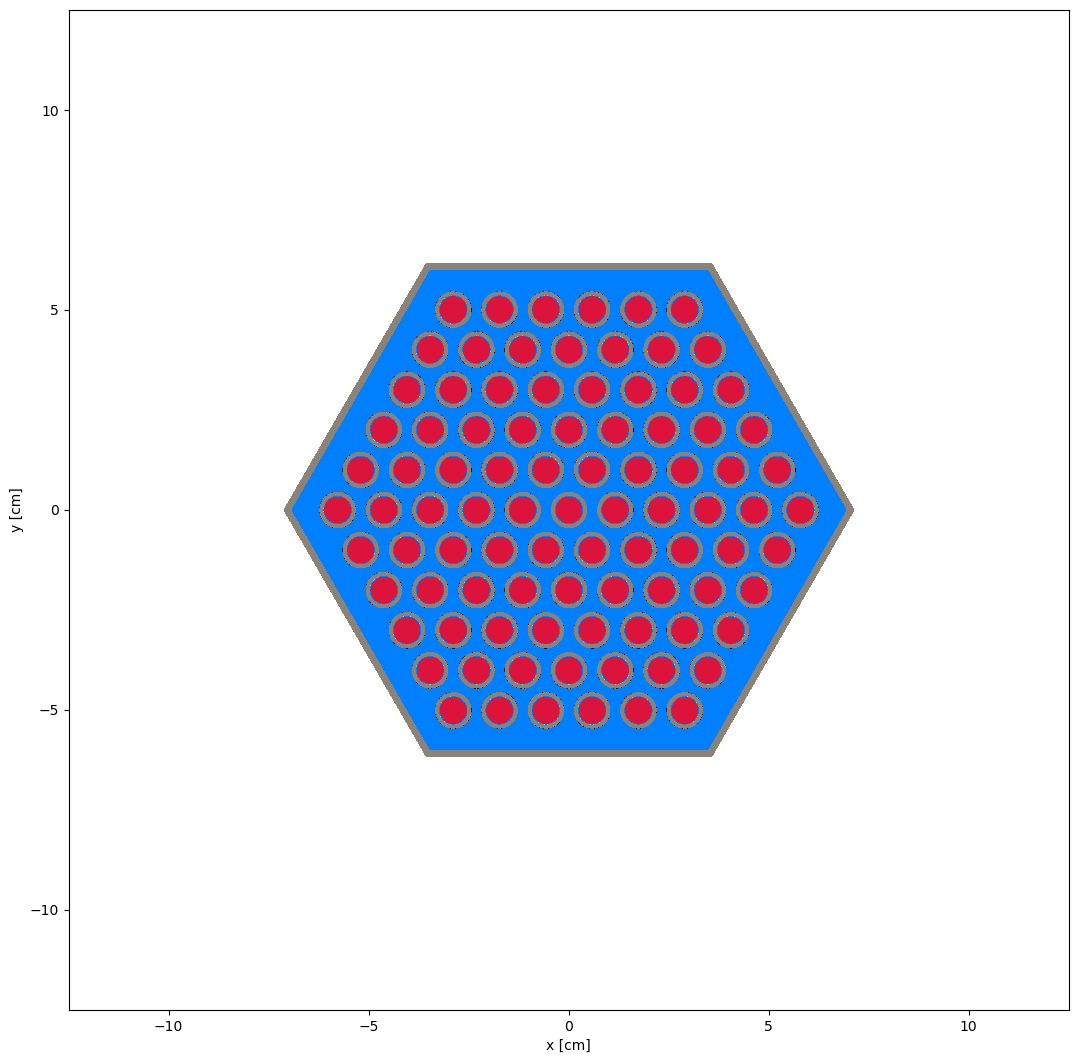

In [6]:
# Fuel assembly modeling.

lattice = openmc.HexLattice()
lattice.center = (0., 0.)
lattice.pitch = (1.157,)
lattice.outer = he_univ
lattice.orientation = 'x'


# outer_ring = [f_ma]*48

# ring_1 = [f_ma]*42

# ring_2 = [f_ma]*36

# ring_3 = [f_ma]*30

# ring_4 = [f_ma]*24

# ring_5 = [f_ma]*18

# ring_6 = [f_ma]*12

# ring_7 = [f_ma]*6

# inner_ring = [f_ma]

# lattice.universes = [outer_ring,
#                      ring_1,
#                      ring_2,
#                      ring_3,
#                      ring_4,
#                      ring_5,
#                      ring_6,
#                      ring_7,
#                      inner_ring]





ring_3 = [f_ma]*30

ring_4 = [f_ma]*24

ring_5 = [f_ma]*18

ring_6 = [f_ma]*12

ring_7 = [f_ma]*6

inner_ring = [f_ma]

lattice.universes = [ring_3,
                     ring_4,
                     ring_5,
                     ring_6,
                     ring_7,
                     inner_ring]


# wrapper_inner = openmc.model.HexagonalPrism(edge_length=9*1.157, orientation='x', boundary_type='transmission')
# wrapper_outer = openmc.model.HexagonalPrism(edge_length=(0.2+9*1.157), orientation='x', boundary_type='reflective')

wrapper_inner = openmc.model.HexagonalPrism(edge_length=6*1.157, orientation='x', boundary_type='transmission')
wrapper_outer = openmc.model.HexagonalPrism(edge_length=(0.2+6*1.157), orientation='x', boundary_type='reflective')



wrapper_cell = openmc.Cell(fill=sc, region=+wrapper_inner & -wrapper_outer & -top & +bottom)

main_in_assembly = openmc.Cell(fill=lattice, region=-wrapper_inner & -top & +bottom)

main_in_u = openmc.Universe(cells=[main_in_assembly, wrapper_cell])


# Plot the universe
main_in_u.plot(origin = (0,0,0), pixels=(1000, 1000), width = (25,25), color_by = 'material',
               colors = {MA_fuel:(220,20,60), sc:(139,131,120), sc1:(18,18,18), helium:(0,127,255),
                    wr:(0,255,255), r:(84,255,159), helium1:(0,127,255)})

In [7]:
geometry = openmc.Geometry(main_in_u)
geometry.export_to_xml()


In [8]:
point = openmc.stats.Point((0, 0, 0))
src = openmc.IndependentSource(space=point)

settings = openmc.Settings()
settings.temperature = {'method':'interpolation'}
settings.source = src
settings.batches = 60
settings.inactive = 20
settings.particles = 20000
settings.export_to_xml()

In [9]:
# openmc.run()

In [10]:
import openmc.deplete 
model = openmc.Model(geometry=geometry, settings=settings)

# time_steps = [5] + [5] + [40] + [50]*11

time_steps = [100]*5


# MA_fuel.volume =  217 * 3.1416 * ((0.3355)**2) * 165

MA_fuel.volume =  90 * 3.1416 * ((0.3355)**2) * 86

op = openmc.deplete.CoupledOperator(model, "/home/razu/Downloads/chain_casl_sfr.xml")

power = 30.14 * op.heavy_metal

# power = 2400 * (10**6)/516 

integrator = openmc.deplete.PredictorIntegrator(op, time_steps, power,timestep_units='d') 

In [11]:
print(op.heavy_metal)

26873.69101668951


In [12]:
print(power)

809973.0472430219


In [13]:
max_step = 2 * op.heavy_metal / power * 1E3
print("\"Maximum\" depletion step: {:5.3} [d]".format(max_step))

"Maximum" depletion step:  66.4 [d]


In [14]:
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Mo96 from /home/razu/Downloads/endfb-8/neutron/Mo96.h5
 Reading Mo97 from /home/razu/Downloads/endfb-8/neutron/Mo97.h5
 Reading Mo98 from /home/razu/Downloads/endfb-8/neutron/Mo98.h5
 Reading Mo99 from /home/razu/Downloads/endfb-8/neutron/Mo99.h5
 Reading Mo100 from /home/razu/Downloads/endfb-8/neutron/Mo100.h5
 Reading Tc99 from /home/razu/Downloads/endfb-8/neutron/Tc99.h5


 Reading Ru100 from /home/razu/Downloads/endfb-8/neutron/Ru100.h5
 Reading Ru101 from /home/razu/Downloads/endfb-8/neutron/Ru101.h5
 Reading Ru102 from /home/razu/Downloads/endfb-8/neutron/Ru102.h5
 Reading Ru103 from /home/razu/Downloads/endfb-8/neutron/Ru103.h5
 Reading Ru104 from /home/razu/Downloads/endfb-8/neutron/Ru104.h5
 Reading Ru105 from /home/razu/Downloads/endfb-8/neutron/Ru105.h5
 Reading Ru106 from /home/razu/Downloads/endfb-8/neutron/Ru106.h5
 Reading Rh103 from /home/razu/Downloads/endfb-8/neutron/Rh103.h5
 Reading Rh104 from /home/razu/Downloads/endfb-8/neutron/Rh104.h5
 Reading Rh105 from /home/razu/Downloads/endfb-8/neutron/Rh105.h5
 Reading Pd104 from /home/razu/Downloads/endfb-8/neutron/Pd104.h5
 Reading Pd105 from /home/razu/Downloads/endfb-8/neutron/Pd105.h5
 Reading Pd106 from /home/razu/Downloads/endfb-8/neutron/Pd106.h5
 Reading Pd107 from /home/razu/Downloads/endfb-8/neutron/Pd107.h5
 Reading Pd108 from /home/razu/Downloads/endfb-8/neutron/Pd108.h5
 Reading P

 Reading Xe130 from /home/razu/Downloads/endfb-8/neutron/Xe130.h5
 Reading Xe131 from /home/razu/Downloads/endfb-8/neutron/Xe131.h5
 Reading Xe132 from /home/razu/Downloads/endfb-8/neutron/Xe132.h5
 Reading Xe133 from /home/razu/Downloads/endfb-8/neutron/Xe133.h5
 Reading Xe134 from /home/razu/Downloads/endfb-8/neutron/Xe134.h5
 Reading Xe135 from /home/razu/Downloads/endfb-8/neutron/Xe135.h5
 Reading Xe136 from /home/razu/Downloads/endfb-8/neutron/Xe136.h5
 Reading Cs133 from /home/razu/Downloads/endfb-8/neutron/Cs133.h5


          2500K
          1200K
          2500K


 Reading Cs134 from /home/razu/Downloads/endfb-8/neutron/Cs134.h5
 Reading Cs135 from /home/razu/Downloads/endfb-8/neutron/Cs135.h5
 Reading Cs136 from /home/razu/Downloads/endfb-8/neutron/Cs136.h5
 Reading Cs137 from /home/razu/Downloads/endfb-8/neutron/Cs137.h5
 Reading Ba134 from /home/razu/Downloads/endfb-8/neutron/Ba134.h5
 Reading Ba137 from /home/razu/Downloads/endfb-8/neutron/Ba137.h5
 Reading Ba140 from /home/razu/Downloads/endfb-8/neutron/Ba140.h5
 Reading La139 from /home/razu/Downloads/endfb-8/neutron/La139.h5
 Reading La140 from /home/razu/Downloads/endfb-8/neutron/La140.h5
 Reading Ce140 from /home/razu/Downloads/endfb-8/neutron/Ce140.h5
 Reading Ce141 from /home/razu/Downloads/endfb-8/neutron/Ce141.h5
 Reading Ce142 from /home/razu/Downloads/endfb-8/neutron/Ce142.h5
 Reading Ce143 from /home/razu/Downloads/endfb-8/neutron/Ce143.h5
 Reading Ce144 from /home/razu/Downloads/endfb-8/neutron/Ce144.h5
 Reading Pr141 from /home/razu/Downloads/endfb-8/neutron/Pr141.h5
 Reading P

          1200K
          2500K


 Reading Gd154 from /home/razu/Downloads/endfb-8/neutron/Gd154.h5
 Reading Gd155 from /home/razu/Downloads/endfb-8/neutron/Gd155.h5
 Reading Gd156 from /home/razu/Downloads/endfb-8/neutron/Gd156.h5
 Reading Gd157 from /home/razu/Downloads/endfb-8/neutron/Gd157.h5
 Reading Gd158 from /home/razu/Downloads/endfb-8/neutron/Gd158.h5
 Reading Gd159 from /home/razu/Downloads/endfb-8/neutron/Gd159.h5
 Reading Gd160 from /home/razu/Downloads/endfb-8/neutron/Gd160.h5
 Reading Tb159 from /home/razu/Downloads/endfb-8/neutron/Tb159.h5
 Reading Tb160 from /home/razu/Downloads/endfb-8/neutron/Tb160.h5
 Reading Tb161 from /home/razu/Downloads/endfb-8/neutron/Tb161.h5
 Reading Dy160 from /home/razu/Downloads/endfb-8/neutron/Dy160.h5
 Reading Dy161 from /home/razu/Downloads/endfb-8/neutron/Dy161.h5
 Reading Dy162 from /home/razu/Downloads/endfb-8/neutron/Dy162.h5
 Reading Dy163 from /home/razu/Downloads/endfb-8/neutron/Dy163.h5
 Reading Dy164 from /home/razu/Downloads/endfb-8/neutron/Dy164.h5
 Reading H

          1200K
          2500K


 Reading Th232 from /home/razu/Downloads/endfb-8/neutron/Th232.h5
 Reading Th233 from /home/razu/Downloads/endfb-8/neutron/Th233.h5
 Reading Th234 from /home/razu/Downloads/endfb-8/neutron/Th234.h5
 Reading Pa231 from /home/razu/Downloads/endfb-8/neutron/Pa231.h5
 Reading Pa232 from /home/razu/Downloads/endfb-8/neutron/Pa232.h5
 Reading Pa233 from /home/razu/Downloads/endfb-8/neutron/Pa233.h5
 Reading U232 from /home/razu/Downloads/endfb-8/neutron/U232.h5
 Reading U233 from /home/razu/Downloads/endfb-8/neutron/U233.h5
 Reading U234 from /home/razu/Downloads/endfb-8/neutron/U234.h5
 Reading U236 from /home/razu/Downloads/endfb-8/neutron/U236.h5
 Reading U237 from /home/razu/Downloads/endfb-8/neutron/U237.h5
 Reading U239 from /home/razu/Downloads/endfb-8/neutron/U239.h5
 Reading Np236 from /home/razu/Downloads/endfb-8/neutron/Np236.h5
 Reading Np238 from /home/razu/Downloads/endfb-8/neutron/Np238.h5
 Reading Np239 from /home/razu/Downloads/endfb-8/neutron/Np239.h5
 Reading Pu236 from /h

[openmc.deplete] t=17280000.0 s, dt=8640000 s, source=809973.0472430219
 Maximum neutron transport energy: 20000000 eV for He3
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.05293
        2/1    1.05023
        3/1    1.06016
        4/1    1.05689
        5/1    1.04926
        6/1    1.05905
        7/1    1.06111
        8/1    1.06043
        9/1    1.05984
       10/1    1.05996
       11/1    1.06046
       12/1    1.04719
       13/1    1.05348
       14/1    1.05101
       15/1    1.05220
       16/1    1.05000
       17/1    1.05963
       18/1    1.04997
       19/1    1.05219
       20/1    1.05655
       21/1    1.06061
       22/1    1.04027    1.05044 +/- 0.01017
       23/1    1.05987    1.05358 +/- 0.00666
       24/1    1.05308    1.05346 +/- 0.00471
       25/1    1.05761    1.05429 +/- 0.00374
       

        2/1    1.06243
        3/1    1.06428
        4/1    1.05579
        5/1    1.07224
        6/1    1.07498
        7/1    1.06090
        8/1    1.06554
        9/1    1.06255
       10/1    1.06517
       11/1    1.05942
       12/1    1.06396
       13/1    1.06585
       14/1    1.05620
       15/1    1.06207
       16/1    1.06163
       17/1    1.06806
       18/1    1.06914
       19/1    1.06244
       20/1    1.06861
       21/1    1.06033
       22/1    1.06206    1.06120 +/- 0.00087
       23/1    1.07043    1.06427 +/- 0.00312
       24/1    1.06547    1.06457 +/- 0.00222
       25/1    1.07381    1.06642 +/- 0.00253
       26/1    1.06841    1.06675 +/- 0.00209
       27/1    1.06224    1.06611 +/- 0.00188
       28/1    1.06751    1.06628 +/- 0.00164
       29/1    1.06498    1.06614 +/- 0.00145
       30/1    1.06131    1.06565 +/- 0.00138
       31/1    1.06045    1.06518 +/- 0.00134
       32/1    1.05879    1.06465 +/- 0.00133
       33/1    1.06081    1.06435 

[[1.04509507e+00 7.67941287e-04]
 [1.05091949e+00 5.95281317e-04]
 [1.05472077e+00 6.30988611e-04]
 [1.05992748e+00 5.90002727e-04]
 [1.06494791e+00 5.81020248e-04]
 [1.06936723e+00 5.24209936e-04]]


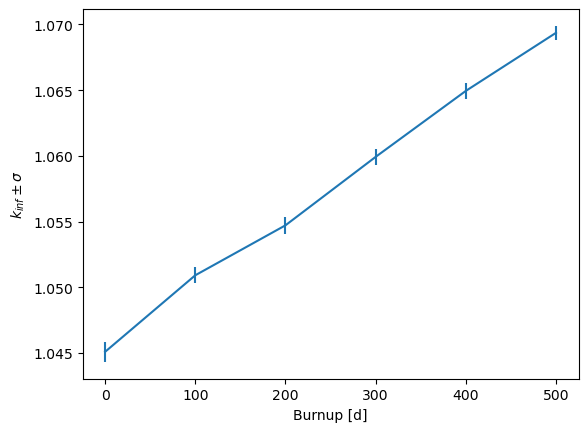

In [15]:
from matplotlib import pyplot

results = openmc.deplete.Results("./depletion_results.h5")

time, k = results.get_keff()

print(k)



time = time/(3600*24)

pyplot.errorbar(time, k[:, 0], yerr=k[:, 1])
pyplot.xlabel("Burnup [d]")
pyplot.ylabel("$k_{inf}\pm \sigma$");

In [16]:
fuel_loading = op.heavy_metal
print('The assembly power is', power, 'W')
print('\nThe time steps are: \n', time)
print('\nThe initial heavy metal loading is', fuel_loading, 'g')

burnup = (power * 10**(-6))*time/(fuel_loading * 10**(-3))
print('\nThe burnup steps are:\n', burnup)

print('\nThe power density is', (power * 10**(-6))/(fuel_loading/1000), 'MW/kg')









The assembly power is 809973.0472430219 W

The time steps are: 
 [  0. 100. 200. 300. 400. 500.]

The initial heavy metal loading is 26873.69101668951 g

The burnup steps are:
 [ 0.     3.014  6.028  9.042 12.056 15.07 ]

The power density is 0.030140000000000004 MW/kg
